# TensorFlow Linear Regression

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/17-1.png" style="max-width: 80%; height: auto;">

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/17-2.png" style="max-width: 80%; height: auto;">

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

2.0.0


In [2]:
# train data 
# t_data = 2*x1 -3*x2 + 2*x3

x_data = np.array([ [1, 2, 0], [5, 4, 3], [1, 2, -1], [3, 1, 0], [2, 4, 2], 
                    [4, 1, 2], [-1, 3, 2], [4, 3, 3], [0, 2, 6], [2, 2, 1],
                    [1, -2, -2], [0, 1, 3], [1, 1, 3], [0, 1, 4], [2, 3, 3] ])

t_data = np.array([-4, 4, -6, 3, -4, 
                   9, -7, 5, 6, 0,
                   4, 3, 5, 5, 1])

print('x_data.shape = ', x_data.shape, ', t_data.shape = ', t_data.shape)

x_data.shape =  (15, 3) , t_data.shape =  (15,)


In [4]:
# Linear Regression 을 keras 이용하여 생성

model = Sequential()

model.add(Dense(1, input_shape=(3, ),activation='linear'))  # 노드 3개인 출력층 생성

In [5]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


## model.fit(verbose...) 
### - verbose = 0 : 출력 없음 
### - verbose = 1 : 자세히 출력 $\rightarrow$ 2 $\rightarrow$ 3 간단히 출력

In [6]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, verbose=0, epochs=1000)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)


Elapsed Time =>  0:00:00.806704


In [7]:
# hist 타입 및 key 확인

print(type(hist))
print(hist.history.keys())

<class 'tensorflow.python.keras.callbacks.History'>
dict_keys(['loss'])


In [8]:
# 모델 입력, 출력, 가중치 확인

print(model.input)
print(model.output)
print(model.weights)

Tensor("dense_1_input:0", shape=(None, 3), dtype=float32)
Tensor("dense_1/Identity:0", shape=(None, 1), dtype=float32)
[<tf.Variable 'dense_1/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.999876 ],
       [-3.0001287],
       [ 1.9999146]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.0008385], dtype=float32)>]


In [9]:
import pandas as pd

history_DF=pd.DataFrame(hist.history)
history_DF

,loss
0,4.573198e+01
1,3.555144e+01
2,2.987737e+01
3,2.646283e+01
4,2.419658e+01
...,...
995,2.121434e-07
996,2.097351e-07
997,2.073471e-07
998,2.054180e-07


### [Matplotlib 눈금 표시하기](https://wikidocs.net/92089)

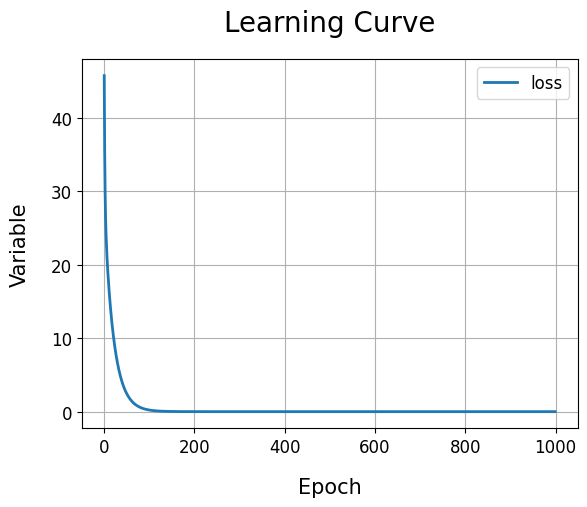

In [10]:
import matplotlib.pyplot as plt

# history_DF.plot(figsize=(10,7), linewidth=3)
history_DF.plot(linewidth=2)

plt.grid(True)
plt.legend(loc="upper right", fontsize=12)
plt.title("Learning Curve", fontsize=20, pad=20)
plt.xlabel('Epoch', fontsize=15, loc='center',labelpad=15)
plt.ylabel('Variable', fontsize=15, rotation=90, loc='center', labelpad=15)
plt.tick_params(axis='both', labelsize=12)
# plt.tick_params(axis='y', labelsize=15)

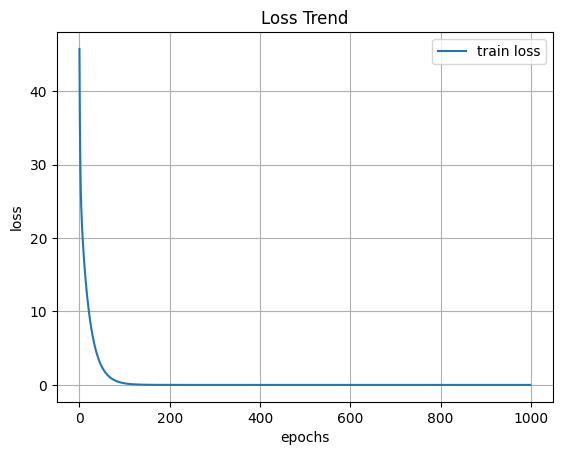

In [11]:
# 손실함수 출력

import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')

plt.show()

In [12]:
# 예측,  ret_val = 2*x1 -3*x2 + 2*x3

test_data = [ [5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2] ]

ret_val = [ 2*data[0] -3*data[1] + 2*data[2]  for data in test_data ]

prediction_val = model.predict(np.array(test_data))

print(prediction_val)
print('==================')
print(ret_val)

[[-5.0004253]
 [-2.999881 ]
 [-3.9989522]
 [ 8.998784 ]
 [ 7.000642 ]]
[-5, -3, -4, 9, 7]
